<a href="https://colab.research.google.com/github/saniya1027108/Knowledge-Distillation/blob/main/KD_BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PROJECTS/BRAIN TUMOR DETECTION'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
image_directory='/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset'

In [5]:
!ls '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN'

 annotations_all.json  'archive (3).zip'   TEST   TRAIN   VAL


In [6]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/'. 
There are 0 directories and 1500 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/no'. 
There are 0 directories and 1510 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/yes'. 


In [7]:
no_tumor_images=os.listdir(image_directory + '/no')
yes_tumor_images=os.listdir(image_directory + '/yes')

In [8]:
image_directory = pathlib.Path("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset")
class_names = np.array(sorted([item.name for item in image_directory.glob("*")]))
print(class_names)

['no' 'yes']


Tumor Image Shape:  (336, 264, 3)
Healthy image shape:  (194, 259, 3)


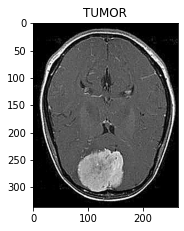

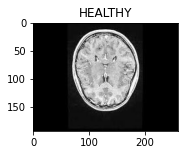

In [9]:
yes_image = cv2.imread('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/yes/y1000.jpg')
plt.figure(figsize=(15,6))
plt.subplot(151)
plt.title("TUMOR")
plt.imshow(yes_image)
print('Tumor Image Shape: ', yes_image.shape)

no_image = cv2.imread('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/no/no1000.jpg')
plt.figure(figsize=(15,6))
plt.subplot(151)
plt.title("HEALTHY")
plt.imshow(no_image)
print('Healthy image shape: ', no_image.shape)

In [10]:
train_dir = '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN/yes'
train_file_paths = os.listdir('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN/yes')
gen = train_dir +'/'+ train_file_paths[0]
gen.split('/')[-2]

'yes'

In [11]:
# To read and preprocess the image
def load_and_preprocess(filepath):
  """
  Takes a file path and preprocess images into 224 x 3 
  """
  img_file = tf.io.read_file(filepath)
  img = tf.image.decode_image(img_file)
  img = tf.image.resize(img, (224, 224))
  
  return img

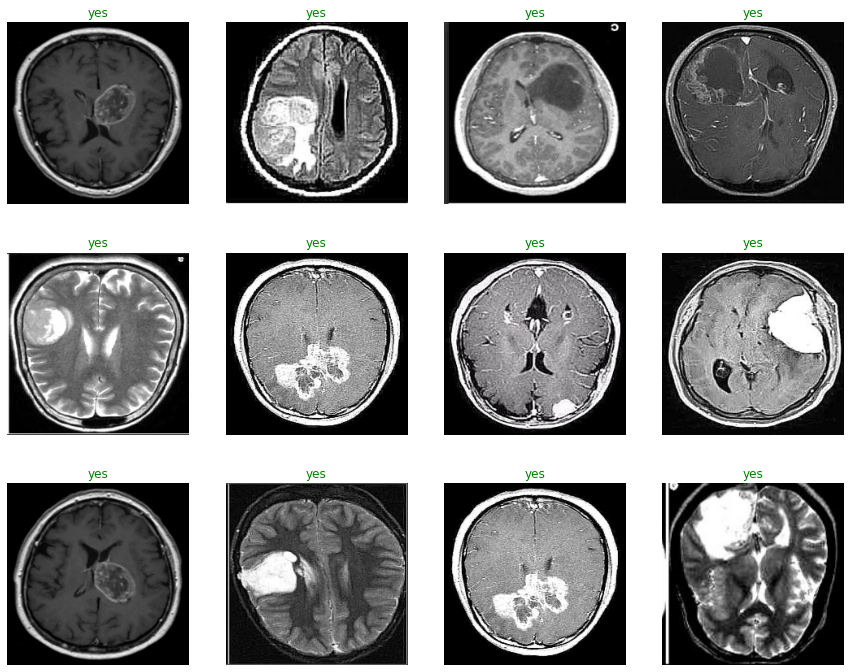

In [17]:
import random
# Visualizing multiple random images
plt.figure(figsize=(15, 12))
for i in range(12):
  # Random selecting an image from the train dataset
  random_file = train_dir + '/' + random.choice(train_file_paths)
  img = load_and_preprocess(random_file)

  # Plotting the random images
  plt.subplot(3, 4, i+1)
  plt.title(random_file.split("/")[-2], color="green")
  plt.axis(False)
  plt.imshow(img / 255.)

In [18]:
pred_image = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred')
pred_jpg_path = list(pred_image.glob(r"*.jpg"))
print(pred_jpg_path)

[PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred0.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred13.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred25.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred57.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred44.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred55.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred43.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred46.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred4.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred7.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred39.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred3.jp

In [19]:
pred_jpg_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],pred_jpg_path))
print(pred_jpg_labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [20]:
pred_jpg_path=pd.Series(pred_jpg_path, name= "JPG").astype(str)
pred_jpg_label = pd.Series(pred_jpg_labels, name="TUMOR_CATEGORY")

In [21]:
yes_image = yes_image/255
no_image = no_image/255

In [22]:
yes_image = 0

In [23]:
train_path = "/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN"

Data Preprocessing

In [26]:
#Dividing our data into Train/Test/Val
from pathlib import Path
train_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN')
test_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TEST')
val_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/VAL')

In [27]:
train_directory = pathlib.Path("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN")
class_names = np.array(sorted([item.name for item in train_directory.glob("*")]))

print(class_names)

['no' 'yes']


In [28]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    validation_split=None,
    seed=123,
    image_size=(224,224),
    )
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    validation_split=None,
    seed=123,
    image_size=(224,224),
    )
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    validation_split=None,
    seed=123,
    image_size=(224,224),
    )

Found 2100 files belonging to 2 classes.
Found 900 files belonging to 2 classes.
Found 253 files belonging to 2 classes.


In [29]:
# Train Test split
IMG_SIZE = (224, 224)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator()

train_data = image_generator.flow_from_directory(directory='/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN',
                                                 target_size=IMG_SIZE,
                                                 seed=42)

test_data = image_generator.flow_from_directory(directory='/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TEST',
                                                seed=42,
                                                target_size=IMG_SIZE)

Found 2100 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [30]:
len(train_ds)

66

In [31]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_train = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))

normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))

normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))

In [34]:
from tensorflow.keras.layers.experimental import preprocessing

# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

# EfficientNetB0 MODEL

In [35]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting input layer 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/5
66/66 [==============================] - 1626s 25s/step - loss: 0.4246 - accuracy: 0.7952 - val_loss: 0.3629 - val_accuracy: 0.8622
Epoch 2/5
66/66 [==============================] - 25s 373ms/step - loss: 0.3008 - accuracy: 0.8733 - val_loss: 0.3270 - val_accuracy: 0.8822
Epoch 3/5
66/66 [==============================] - 23s 348ms/step - loss: 0.2467 - accuracy: 0.9052 - val_loss: 0.3304 - val_accuracy: 0.8656
Epoch 4/5
66/66 [==============================] - 21s 319ms/step - loss: 0.2230 - accuracy: 0.9238 - val_loss: 0.3348 - val_accuracy: 0.8567
Epoch 5/5
66/66 [==============================] - 21s 310ms/step - loss: 0.1985 - accuracy: 0.9276 - val_loss: 0.2668 - val_accuracy: 0.8956


In [48]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable

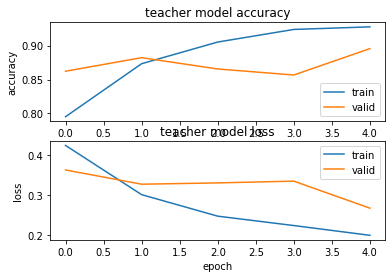

In [38]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('teacher model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')

 # summarize history for loss
plt.subplot(212)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('teacher model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Evaluate the Model on the Test Data

Test set shape :  (900, 224, 224, 3)
29/29 [==============================] - 3s 63ms/step


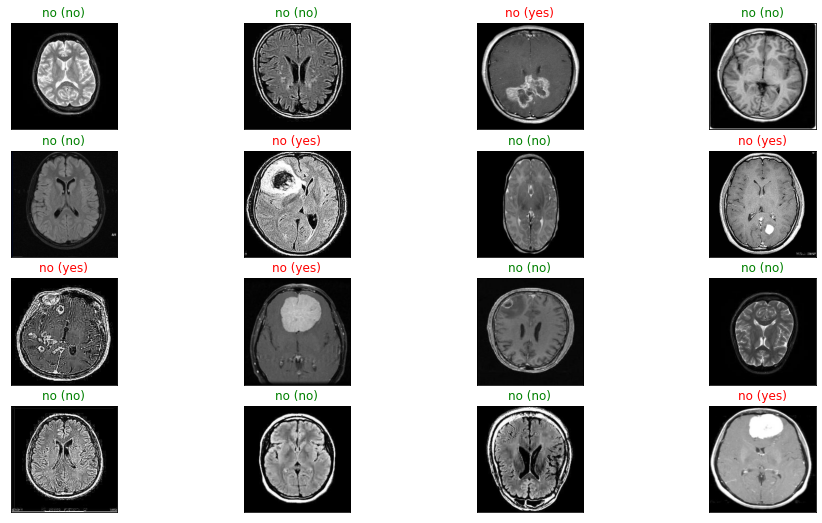

In [40]:
from sklearn.datasets import load_files
import numpy as np
test_dir = '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TEST'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,2)
# We just have the file names in the x set. Let's load the images and convert them into array.
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(tf.image.resize(img_to_array(load_img(file)), (224, 224)))
    return images_as_array
x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)
x_test = x_test.astype('float32')/255
# Let's visualize test prediction.
y_pred_logits = model_1.predict(x_test)
y_pred = tf.nn.softmax(y_pred_logits)
# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Calculating the accuracy of the test dataset

In [41]:
print(model_1.metrics_names) 
loss, acc = model_1.evaluate(x_test, y_test, verbose = 1)
print('test loss = ', loss) 
print('test accuracy = ',acc)

['loss', 'accuracy']
29/29 [==============================] - 2s 67ms/step - loss: 1.0201 - accuracy: 0.4922
test loss =  1.020100474357605
test accuracy =  0.49222221970558167


**MODEL 2**

Student Model with Knowledge Distillation

In [49]:
#Defining the Student Network

# import necessary layers  
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
# input
input = Input(shape =(224,224,3))
# 1st Conv Block
x = Conv2D (filters =8, kernel_size =3, padding ='valid', activation='relu')(input)
x = Conv2D (filters =8, kernel_size =3, padding ='valid', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='valid')(x)
# 2nd Conv Block
x = Conv2D (filters =16, kernel_size =3, padding ='valid', activation='relu')(x)
x = Conv2D (filters =16, kernel_size =3, padding ='valid', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='valid')(x)
# 3rd Conv block
x = Conv2D (filters =32, kernel_size =3, padding ='valid', activation='relu')(x)
x = Conv2D (filters =32, kernel_size =3, padding ='valid', activation='relu')(x)
#x = Conv2D (filters =32, kernel_size =3, padding ='valid', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='valid')(x)
# 4th Conv block
x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
#x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='valid')(x)
# 5th Conv block
x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
#x = Conv2D (filters =64, kernel_size =3, padding ='valid', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='valid')(x)
# Fully connected layers
x = Flatten()(x)
#x = Dense(units = 1028, activation ='relu')(x)
x = Dense(units = 256, activation ='relu')(x)
x = Dropout(0.5)(x)
output = Dense(units = 2)(x)   #last layer with linear activation
# creating the model
s_model_1 = Model (inputs=input, outputs =output)
s_model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 8)       584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 16)      1168      
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 16)      2320      
                                                           

Defining the Distiller

In [50]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student
    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.5,
        temperature=2,
    ):
        """ Configure the distiller.
        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature
    def train_step(self, data):
        # Unpack data
        x, y = data
        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)
        #model = ...  # create the original model
        teacher_predictions = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
          # Forward pass of student
            # Forward pass of student
            student_predictions = self.student(x, training=True)
            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss +  distillation_loss
        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)
        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results
    def test_step(self, data):
        # Unpack the data
        x, y = data
        # Compute predictions
        y_prediction = self.student(x, training=False)
        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)
        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)
        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


Compiling and Running the Student Network Distiller:

In [52]:
# Initialize and compile distiller
distiller = Distiller(student=s_model_1, teacher=model_1)
distiller.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001),
    metrics=['acc'],
    student_loss_fn=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
distillation_loss_fn=tf.keras.losses.KLDivergence(),
    alpha=0.5,
    temperature=2,
)
# Distill teacher to student
distiller_hist = distiller.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
66/66 [==============================] - 19s 213ms/step - acc: 0.7305 - student_loss: 0.5416 - distillation_loss: 0.0315 - val_acc: 0.7889 - val_student_loss: 0.3545
Epoch 2/5
66/66 [==============================] - 13s 204ms/step - acc: 0.8005 - student_loss: 0.4613 - distillation_loss: 0.0272 - val_acc: 0.8344 - val_student_loss: 0.3643
Epoch 3/5
66/66 [==============================] - 13s 202ms/step - acc: 0.8424 - student_loss: 0.4112 - distillation_loss: 0.0292 - val_acc: 0.8644 - val_student_loss: 0.2699
Epoch 4/5
66/66 [==============================] - 14s 204ms/step - acc: 0.8657 - student_loss: 0.3752 - distillation_loss: 0.0327 - val_acc: 0.8389 - val_student_loss: 0.5212
Epoch 5/5
66/66 [==============================] - 13s 204ms/step - acc: 0.8990 - student_loss: 0.3458 - distillation_loss: 0.0341 - val_acc: 0.8978 - val_student_loss: 0.3678


Checking the plot of accuracy and loss for each epoch:

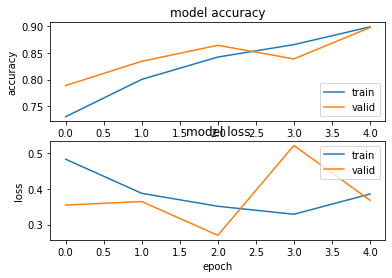

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(distiller_hist.history['acc'])  
plt.plot(distiller_hist.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='lower right')  
 # summarize history for loss  
plt.subplot(212)  
plt.plot(distiller_hist.history['student_loss'])  
plt.plot(distiller_hist.history['val_student_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='upper right')  
plt.show()
plt.tight_layout()

Checking accuracy on the test data:

In [54]:
print(distiller.metrics_names)
acc, loss = distiller.evaluate(x_test, y_test, verbose = 1) 
print('test loss = ', loss)
print('test accuracy = ',acc)

['acc']
29/29 [==============================] - 1s 23ms/step - acc: 0.7189 - student_loss: 0.6914
test loss =  0.6911256909370422
test accuracy =  0.7188888788223267
